# Problem 3 & 4: MNIST Dataset

Your goal in this problem is to *parse*, *normalize*, and otherwise *prepare* two common data sets (MNIST + 20NG) for classification. In this problem, that includes prepping the datasets for **[dis]similarity** computations.


## MNIST DATASET

The mnist dataset is a collection of images of handwritten numbers between 0 and 9 commonly used to train and test machine learning algorithms

reference 

- [MNIST database - Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Question 3 Part I

Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.

NOTE: 

- As MNIST is comprised of pixel images, they often come 'normalized' in a pre-formatted range [0-255], however their are advantages to having 0 mean.

- When normalizing a column, make sure to normalize its values across all datapoints (train, test, validation, etc) for consistency Depending on what similarity/distance measure you use, computation of similarity might be easy but the size of the similarity matrix might present a challenge.


In [77]:
# load the mnist dataset and merge to normalize together
(train_x, train_y),(test_x, test_y) = mnist.load_data()
X_data = np.concatenate((train_x, test_x), axis=0)
y_data = np.concatenate((train_y, test_y), axis=0)

# print info about the dataset from keras.datasets
print(f'The MNIST dataset contains {X_data.shape[0]} images that are {X_data.shape[1]} x {X_data.shape[2]} pixels.')

The MNIST dataset contains 70000 images that are 28 x 28 pixels.


In [84]:
# normalize the dataset using shift-scale and zero mean unit variance w and w/o binary values


def shift_scale_normalization(data):
    '''function to shift-scale normalize a np.array'''
    # get min and max
    minimum = np.min(data)
    maximum = np.max(data)
    # shift scale normalization
    return (data - minimum) / (maximum - minimum)


def zero_mean_unit_variance_normalization(data):
    '''function to zero mean unit variance normalize a np.array'''
    # subtract the mean
    mean_centered = data - np.mean(data)
    # divide by the standard deviation
    normalized = mean_centered / np.std(data)
    return normalized

def make_binary(data, threshold):
    '''function to turn dataset with non-binany values into one with binary values given a threshold'''
    return (data > threshold).astype(int)

# shift and scale normalize train_x
X_data_shift_scale_normalized = shift_scale_normalization(X_data)
# simplify dataset to be binary values
X_data_BINARY_shift_scale_normalized = make_binary(X_data_shift_scale_normalized, 0.5)

# 
X_data_zero_mean_unit_variance = zero_mean_unit_variance_normalization(X_data)
X_data_BINARY_zero_mean_unit_variance = make_binary(X_data_zero_mean_unit_variance,0)



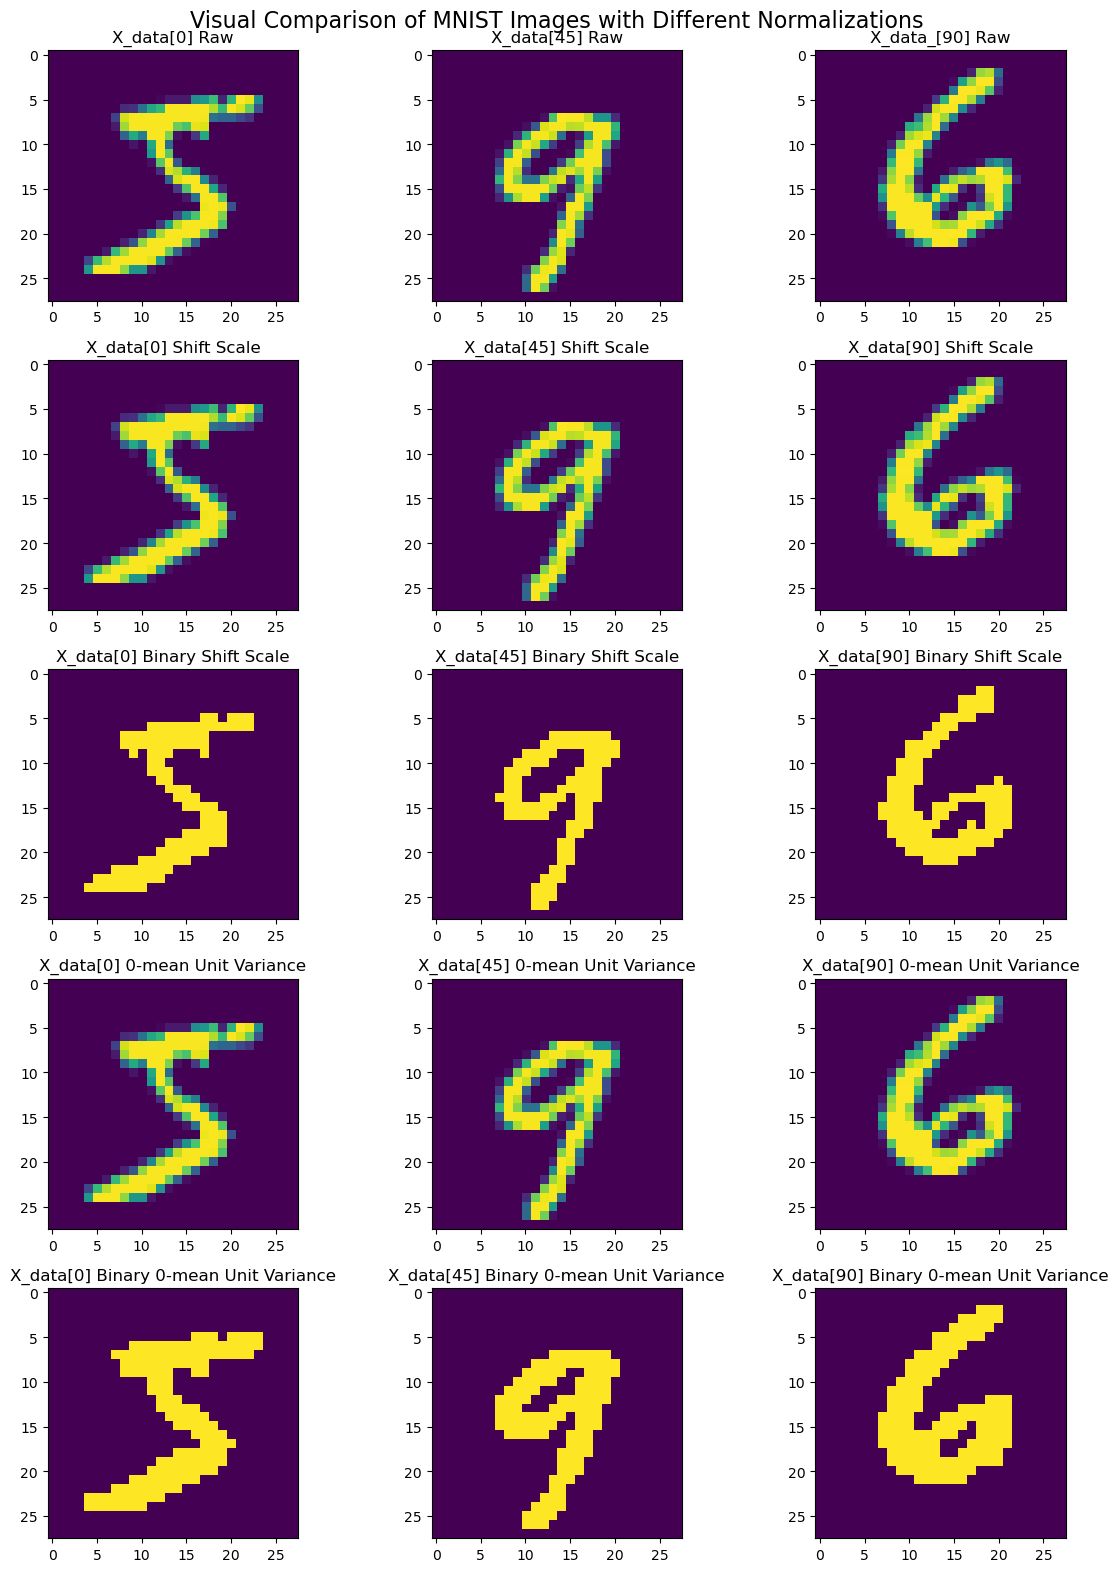

In [93]:
# plot what the images look like after normalization compared to original
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axs = plt.subplots(5, 3, figsize=(12, 16))
fig.suptitle("Visual Comparison of MNIST Images with Different Normalizations", fontsize=16)

axs[0, 0].imshow(X_data[0])
axs[0, 0].set_title('X_data[0] Raw')
axs[0, 1].imshow(X_data[45])
axs[0, 1].set_title('X_data[45] Raw')
axs[0, 2].imshow(X_data[90])
axs[0, 2].set_title('X_data_[90] Raw')
axs[1, 0].imshow(X_data_shift_scale_normalized[0])
axs[1, 0].set_title('X_data[0] Shift Scale')
axs[1, 1].imshow(X_data_shift_scale_normalized[45])
axs[1, 1].set_title('X_data[45] Shift Scale')
axs[1, 2].imshow(X_data_shift_scale_normalized[90])
axs[1, 2].set_title('X_data[90] Shift Scale')
axs[2, 0].imshow(X_data_BINARY_shift_scale_normalized[0])
axs[2, 0].set_title('X_data[0] Binary Shift Scale')
axs[2, 1].imshow(X_data_BINARY_shift_scale_normalized[45])
axs[2, 1].set_title('X_data[45] Binary Shift Scale')
axs[2, 2].imshow(X_data_BINARY_shift_scale_normalized[90])
axs[2, 2].set_title('X_data[90] Binary Shift Scale')
axs[3, 0].imshow(X_data_zero_mean_unit_variance[0])
axs[3, 0].set_title('X_data[0] 0-mean Unit Variance')
axs[3, 1].imshow(X_data_zero_mean_unit_variance[45])
axs[3, 1].set_title('X_data[45] 0-mean Unit Variance')
axs[3, 2].imshow(X_data_zero_mean_unit_variance[90])
axs[3, 2].set_title('X_data[90] 0-mean Unit Variance')
axs[4, 0].imshow(X_data_BINARY_zero_mean_unit_variance[0])
axs[4, 0].set_title('X_data[0] Binary 0-mean Unit Variance')
axs[4, 1].imshow(X_data_BINARY_zero_mean_unit_variance[45])
axs[4, 1].set_title('X_data[45] Binary 0-mean Unit Variance')
axs[4, 2].imshow(X_data_BINARY_zero_mean_unit_variance[90])
axs[4, 2].set_title('X_data[90] Binary 0-mean Unit Variance')

plt.tight_layout()
plt.show()


In [99]:
def euclidean_distance(array1, array2):
    difference = array1 - array2
    sqrd_difference = np.square(difference)
    sum_squared_difference = np.sum(sqrd_difference)
    return np.sqrt(sum_squared_difference)

def euclidean_distance_matrix(dataset):
    n = len(dataset)
    result = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            result[i][j] = euclidean_distance(dataset[i], dataset[j])
    return result

euclidean_distance_matrix = euclidean_distance_matrix(X_data_BINARY_zero_mean_unit_variance[:2000])


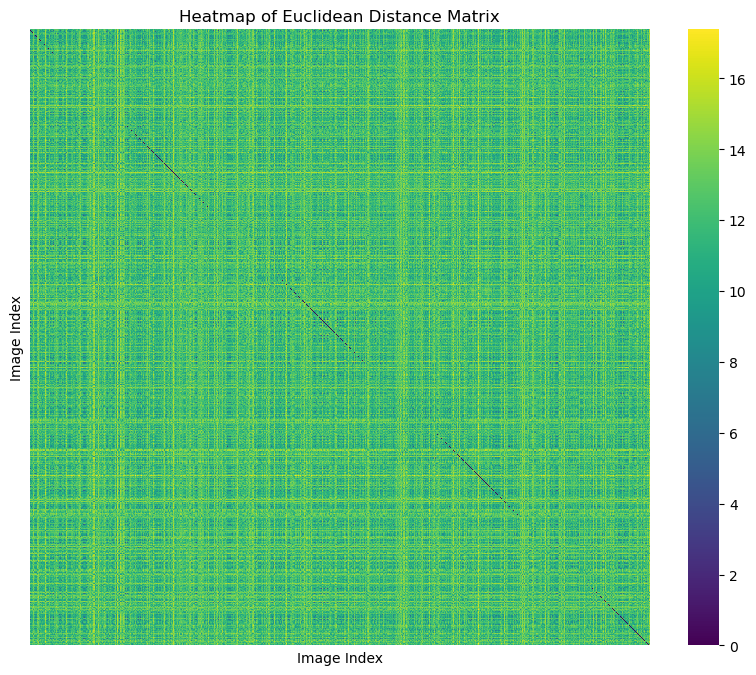

In [100]:
plt.figure(figsize=(10, 8))

sns.heatmap(euclidean_distance_matrix, 
            cmap='viridis', 
            cbar=True, 
            xticklabels=False, 
            yticklabels=False)

plt.title('Heatmap of MNIST Images (1-2000) Euclidean Distance Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()


In [102]:
# https://stackoverflow.com/questions/27967914/efficient-way-to-compute-intersecting-values-between-two-numpy-arrays
# https://en.wikipedia.org/wiki/Jaccard_index

def jaccard_similarity(array1, array2):
    '''this will only work for binary matrix'''
    overlap = np.sum(np.logical_and(array1, array2))
    unique = np.sum(np.logical_or(array1, array2))
    if unique == 0:
        return 0
    result = overlap / (overlap + unique)
    return result


def jaccard_similarity_matrix(dataset):
    n = len(dataset)
    result = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            result[i][j] = jaccard_similarity(dataset[i], dataset[j])
    return result

jaccard_distance_matrix = jaccard_similarity_matrix(X_data_BINARY_zero_mean_unit_variance[:2000])


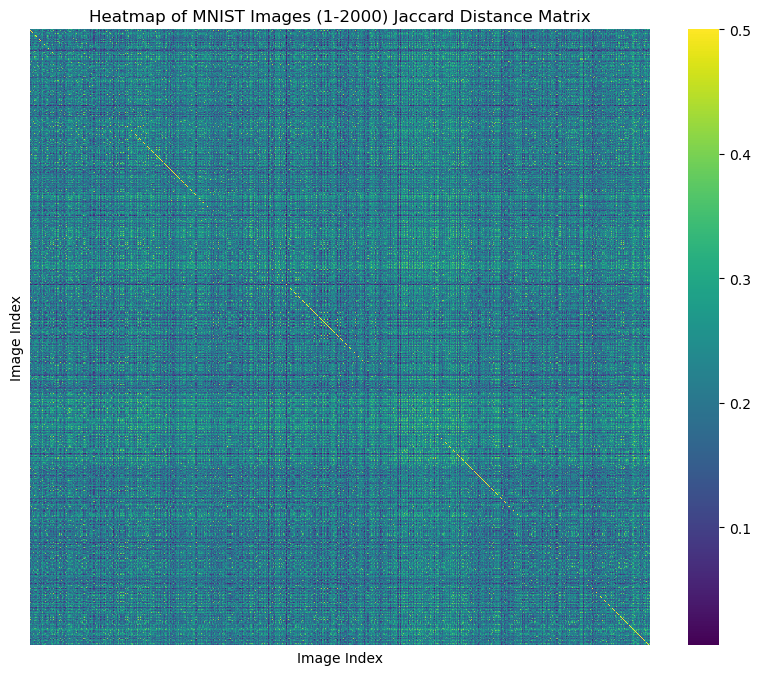

In [104]:
plt.figure(figsize=(10, 8))

sns.heatmap(jaccard_distance_matrix, 
            cmap='viridis', 
            cbar=True, 
            xticklabels=False, 
            yticklabels=False)

plt.title('Heatmap of MNIST Images (1-2000) Jaccard Distance Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

In [129]:
# https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
# https://www.ccs.neu.edu/home/vip/teach/DMcourse/1_intro_sim_knn/dm-lecture2knn-051622.pdf

import numpy as np
from collections import OrderedDict

class KNNClassifier():
    def __init__(self):
        pass   
    
    def _minkowski_distance(self, array1, array2, p):
        difference = array1 - array2
        pwrd_difference = np.power(difference, p)
        sum_powerd_difference = np.sum(pwrd_difference)
        return np.power(sum_powerd_difference, 1 / p)

    def _minkowski_distance_matrix(self, dataset, p):
        n = len(dataset)
        result = np.zeros((n, n))
        for i in range(n):
            for j in range(i, n):
                distance = self._minkowski_distance(dataset[i], dataset[j], p)
                result[i][j] = distance
                result[j][i] = distance
        return result

    def _jaccard_similarity(self, array1, array2):
        intersection = np.sum((array1 & array2))
        union = np.sum((array1 | array2))
        return intersection / union if union > 0 else 0


    def _jaccard_similarity_matrix(self, dataset):
        n = len(dataset)
        result = np.zeros((n, n))
        for i in range(n):
            for j in range(i, n):
                similarity = self._jaccard_similarity(dataset[i], dataset[j])
                result[i][j] = similarity
                result[j][i] = similarity
        return result

    def _shift_scale_normalization(self, data):
        # get min and max
        minimum = np.min(data)
        maximum = np.max(data)
        # shift scale normalization
        return (data - minimum) / (maximum - minimum)
    
    def _zero_mean_unit_variance_normalization(self, data):
        # subtract the mean
        mean_centered = data - np.mean(data)
        # divide by the standard deviation
        normalized = mean_centered / np.std(data)
        return normalized

    def _pltImage(self, imgData):
        try:
            fig = plt.figure
            plt.imshow(imgData)
            plt.show()
        except Exception as e:
            print(e)

    def transform(self, 
                  data, 
                  method='shift_scale',  
                  binary_threshold=0, 
                  binary=False):
        # normalize data
        if method == 'shift_scale':
            result = self._shift_scale_normalization(data)
        elif method == 'zero_mean_unit_variance':
            result = self._zero_mean_unit_variance_normalization(data)
        else:
            raise ValueError('Invalid normalization method')
        
        if binary:
            result = np.where(result >= binary_threshold, 1, 0)

        return result
    

    def fit(self, X_train, y_train):
        # for knn this basicly just stores the training data
        self.X_train = X_train
        self.y_train = y_train


    def predict_j(self, 
                X_test, 
                K=30):
        
        if not hasattr(self, "X_train") or not hasattr(self, "y_train"):
            raise ValueError("use fit() before using predict()")

        test_n = len(X_test)
        predictions = []
        for idx, test_sample in enumerate(X_test):
            print(f"Predicting for image {idx + 1} / {test_n}")
            similarities = OrderedDict()

            # loop thu image and label at the same time only storing 
            # distances of K nearest neighbors with labels
            for train_index, (train_sample, label) in enumerate(zip(self.X_train, self.y_train)):
                # calculate jaccard (euclidean distance was trash)
                similarity = self._jaccard_similarity(test_sample, train_sample)
                similarities[(similarity, train_index)] = label

                # only keep K closet neighbors, so i dont crash memory
                if len(similarities) > K:
                    similarities = OrderedDict(sorted(similarities.items(), reverse=True)[:K])

            # get the labels of the nearest neighbors
            k_classes = list(similarities.values())
            print(k_classes)
            # majority vote
            predictions.append(max(set(k_classes), key=k_classes.count))
            

        return predictions
    
    def predict_e(self, 
                X_test, 
                K=30):
        
        if not hasattr(self, "X_train") or not hasattr(self, "y_train"):
            raise ValueError("use fit() before using predict()")

        test_n = len(X_test)
        predictions = []
        for idx, test_sample in enumerate(X_test):
            print(f"Predicting for image {idx + 1} / {test_n}")
            distances = OrderedDict()

            # loop thu image and label at the same time only storing 
            # distances of K nearest neighbors with labels
            for train_index, (train_sample, label) in enumerate(zip(self.X_train, self.y_train)):
                # calculate jaccard (euclidean distance was trash)
                distance = self._minkowski_distance(test_sample, train_sample, 2)
                distances[(distance, train_index)] = label

                # only keep K closet neighbors, so i dont crash memory
                if len(distances) > K:
                    distances = OrderedDict(sorted(distances.items())[:K])

            # get the labels of the nearest neighbors
            k_classes = list(distances.values())
            print(k_classes)
            # majority vote
            predictions.append(max(set(k_classes), key=k_classes.count))
            

        return predictions





    


# Evaluate knn classifier

Here we will test small batches of the following approaches to see what works well and what doesnt off the bat:



In [130]:
# config: K=10, X_raw, euclidean

knn = KNNClassifier()

# do the train test split 
X_train_raw_e, X_test_raw_e, y_train_raw_e, y_test_raw_e = train_test_split(X_data,
                                                                            y_data, 
                                                                            test_size=0.01, 
                                                                            random_state=42)
knn.fit(X_train_raw_e, y_train_raw_e)
# do the predictions
predictions__raw_e = knn.predict_e(X_test_raw_e, K=10)




Predicting for image 1 / 700
[4, 2, 5, 0, 6, 3, 9, 4, 6, 2]
Predicting for image 2 / 700
[7, 7, 7, 8, 7, 9, 7, 2, 9, 5]
Predicting for image 3 / 700
[0, 6, 4, 0, 3, 3, 1, 4, 0, 7]
Predicting for image 4 / 700
[7, 9, 7, 9, 1, 1, 1, 1, 1, 1]
Predicting for image 5 / 700
[0, 7, 5, 0, 5, 5, 7, 5, 5, 7]
Predicting for image 6 / 700
[1, 1, 1, 1, 1, 2, 1, 1, 0, 1]
Predicting for image 7 / 700
[2, 7, 2, 7, 0, 0, 1, 2, 5, 9]
Predicting for image 8 / 700
[1, 6, 1, 1, 4, 0, 1, 2, 6, 1]
Predicting for image 9 / 700
[1, 1, 5, 3, 1, 1, 1, 3, 1, 1]
Predicting for image 10 / 700
[1, 3, 3, 4, 1, 4, 4, 0, 9, 1]
Predicting for image 11 / 700
[1, 8, 1, 8, 7, 1, 1, 1, 1, 1]
Predicting for image 12 / 700
[9, 4, 9, 0, 4, 4, 4, 7, 9, 7]
Predicting for image 13 / 700
[4, 4, 3, 7, 1, 9, 5, 6, 7, 7]
Predicting for image 14 / 700
[5, 3, 1, 8, 0, 1, 3, 1, 1, 8]
Predicting for image 15 / 700
[2, 0, 5, 2, 2, 2, 2, 9, 1, 2]
Predicting for image 16 / 700
[1, 8, 1, 1, 1, 1, 1, 1, 7, 9]
Predicting for image 17 / 700
[0,

In [147]:
# config: K=10, X_raw, jaccard

knn = KNNClassifier()

# do the train test split 
X_train_raw_j, X_test_raw_j, y_train_raw_j, y_test_raw_j = train_test_split(X_data,
                                                                            y_data, 
                                                                            test_size=0.01, 
                                                                            random_state=42)
knn.fit(X_train_raw_j, y_train_raw_j)
# do the predictions
predictions_raw_j = knn.predict_j(X_test_raw_j, K=10)


Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 8, 3, 8, 8, 8, 5, 8, 8, 8]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 6 / 700
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicting for image 7 / 700
[6, 0, 6, 6, 6, 6, 6, 6, 6, 6]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 14 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

In [133]:
# config: K=10, zero mean unit variance (without bianry), euclidean 
knn = KNNClassifier()
X_zmuv = knn.transform(X_data, 
                  method='zero_mean_unit_variance', 
                  binary=False)

# do the train test split 
X_train_zmuv, X_test_zmuv, y_train_zmuv, y_test_zmuv = train_test_split(X_zmuv, 
                                                    y_data, 
                                                    test_size=0.01, 
                                                    random_state=42)


knn.fit(X_train_zmuv, y_train_zmuv)

# do the predictions
predictions_zmuv_e = knn.predict_e(X_test_zmuv, K=10)

Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 8, 8, 8, 8, 3, 5, 3, 3, 3]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 6 / 700
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
Predicting for image 7 / 700
[6, 0, 6, 6, 6, 6, 6, 6, 6, 6]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 3, 3, 3, 3, 3, 9, 3]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 14 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 3, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 7, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

In [135]:
# config: K=10, zero mean unit variance (with bianry), euclidean 
knn = KNNClassifier()
X_zmuv_b = knn.transform(X_data, 
                  method='zero_mean_unit_variance', 
                  binary=True,
                  binary_threshold=0)

# do the train test split 
X_train_zmuv_b, X_test_zmuv_b, y_train_zmuv_b, y_test_zmuv_b = train_test_split(X_zmuv_b, 
                                                    y_data, 
                                                    test_size=0.01, 
                                                    random_state=42)


knn.fit(X_train_zmuv_b, y_train_zmuv_b)

# do the predictions
predictions_zmuv_b_e = knn.predict_e(X_test_zmuv_b, K=10)

Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 3, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 8, 3, 8, 3, 8, 8, 3, 8, 5]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 9]
Predicting for image 6 / 700
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicting for image 7 / 700
[6, 6, 0, 6, 6, 6, 6, 6, 6, 6]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 7, 9, 9, 9, 9, 9]
Predicting for image 14 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

In [136]:
# config: K=10, zero mean unit variance (with bianry), jaccard 
knn = KNNClassifier()
X_zmuv_b = knn.transform(X_data, 
                  method='zero_mean_unit_variance', 
                  binary=True,
                  binary_threshold=0)

# do the train test split 
X_train_zmuv_b, X_test_zmuv_b, y_train_zmuv_b, y_test_zmuv_b = train_test_split(X_zmuv_b, 
                                                    y_data, 
                                                    test_size=0.01, 
                                                    random_state=42)


knn.fit(X_train_zmuv_b, y_train_zmuv_b)

# do the predictions
predictions_zmuv_b_j = knn.predict_j(X_test_zmuv_b, K=10)

Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 3, 8, 8, 8, 8, 5, 8, 8, 8]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 6 / 700
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicting for image 7 / 700
[6, 0, 6, 6, 6, 6, 6, 6, 6, 6]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 9, 9, 9, 7, 9, 9]
Predicting for image 14 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

In [137]:
# config: K=10, shift-scale (without bianry), euclidean 
knn = KNNClassifier()
X_ss = knn.transform(X_data, 
                  method='shift_scale', 
                  binary=False)

# do the train test split 
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, 
                                                    y_data, 
                                                    test_size=0.01, 
                                                    random_state=42)


knn.fit(X_train_ss, y_train_ss)

# do the predictions
predictions_s_e = knn.predict_e(X_test_ss, K=10)

Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 8, 8, 8, 8, 3, 5, 3, 3, 3]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 6 / 700
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
Predicting for image 7 / 700
[6, 0, 6, 6, 6, 6, 6, 6, 6, 6]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 3, 3, 3, 3, 3, 9, 3]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 14 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 3, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 7, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

In [138]:
# config: K=10, shift-scale (with bianry), euclidean 
knn = KNNClassifier()
X_ss_b = knn.transform(X_data, 
                  method='shift_scale', 
                  binary=True,
                  binary_threshold=0.5)

# do the train test split 
X_train_ss_b, X_test_ss_b, y_train_ss_b, y_test_ss_b = train_test_split(X_ss_b, 
                                                    y_data, 
                                                    test_size=0.01, 
                                                    random_state=42)


knn.fit(X_train_ss_b, y_train_ss_b)

# do the predictions
predictions_s_b_e = knn.predict_e(X_test_ss_b, K=10)

Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 5, 8, 8, 8, 3, 3, 3, 8, 5]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 6 / 700
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
Predicting for image 7 / 700
[6, 6, 6, 0, 6, 6, 6, 6, 6, 0]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 7, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 1, 8, 1, 3, 1, 9, 1]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 14 / 700
[8, 3, 8, 8, 8, 3, 8, 8, 8, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 7, 7, 7, 2, 7, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

In [139]:
# config: K=10, shift-scale (with bianry), jaccard 
knn = KNNClassifier()
X_ss_b = knn.transform(X_data, 
                  method='shift_scale', 
                  binary=True,
                  binary_threshold=0.5)

# do the train test split 
X_train_ss_b, X_test_ss_b, y_train_ss_b, y_test_ss_b = train_test_split(X_ss_b, 
                                                    y_data, 
                                                    test_size=0.01, 
                                                    random_state=42)


knn.fit(X_train_ss_b, y_train_ss_b)

# do the predictions
predictions_s_b_j = knn.predict_j(X_test_ss_b, K=10)

Predicting for image 1 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 2 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 3 / 700
[8, 8, 8, 8, 3, 8, 5, 8, 8, 8]
Predicting for image 4 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 5 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 6 / 700
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicting for image 7 / 700
[0, 6, 6, 6, 6, 6, 0, 6, 6, 6]
Predicting for image 8 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 9 / 700
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Predicting for image 10 / 700
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Predicting for image 11 / 700
[3, 3, 3, 3, 3, 3, 3, 3, 8, 8]
Predicting for image 12 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 13 / 700
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Predicting for image 14 / 700
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Predicting for image 15 / 700
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicting for image 16 / 700
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Predicting for image 17 / 700
[9,

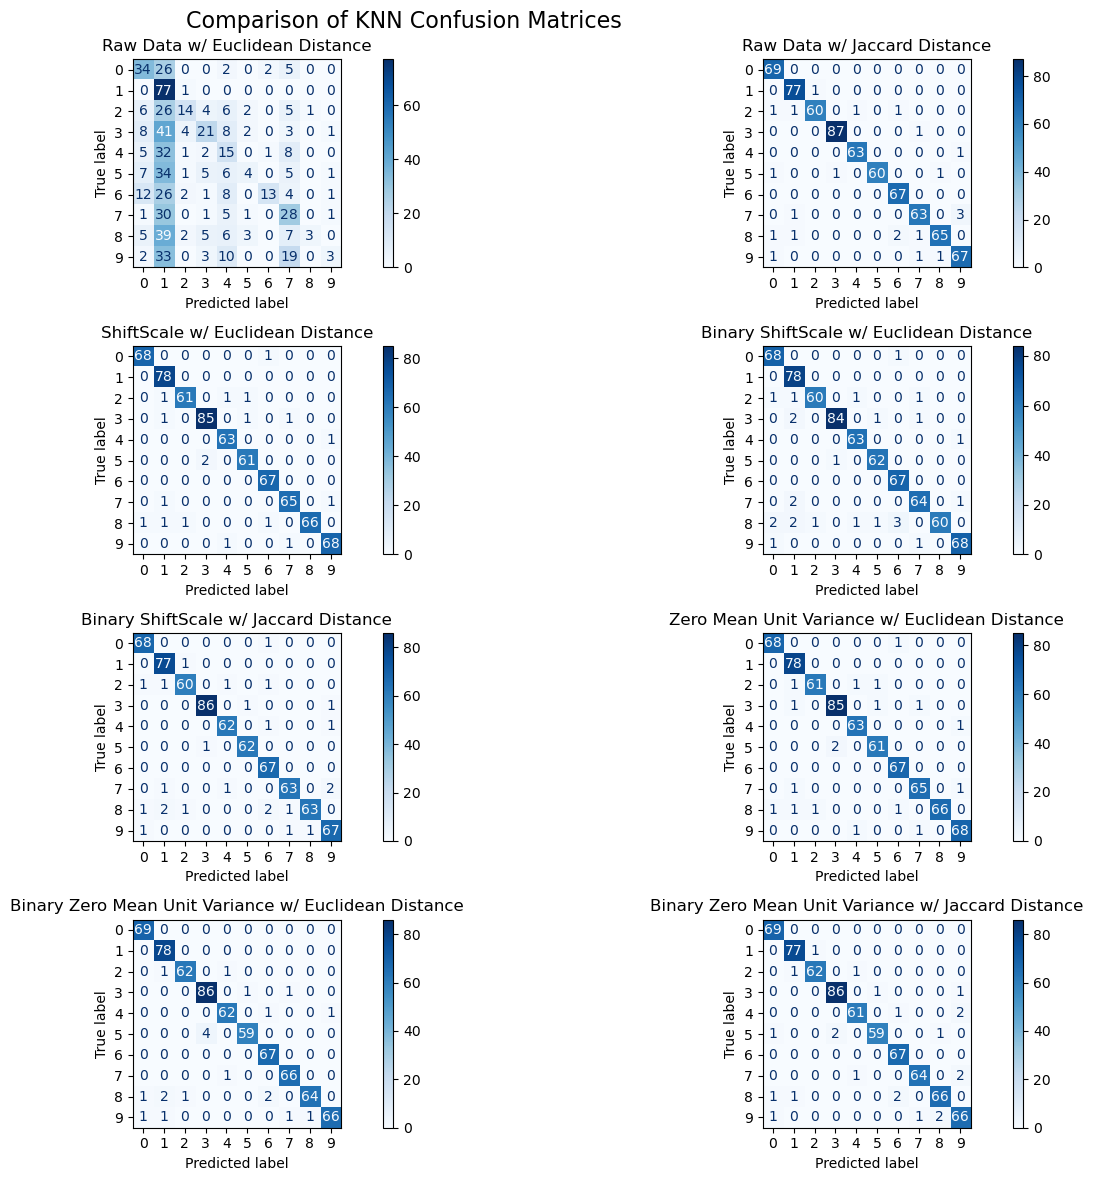

In [148]:

# make a confustion matrix to see who is doing well and who isnt
confusion_matrices = [
    confusion_matrix(y_test_raw_e, predictions__raw_e, labels=np.unique(predictions__raw_e)),
    confusion_matrix(y_test_raw_j, predictions_raw_j, labels=np.unique(predictions_raw_j)),
    confusion_matrix(y_test_ss, predictions_s_e, labels=np.unique(y_test_ss)),
    confusion_matrix(y_test_ss_b, predictions_s_b_e, labels=np.unique(y_test_ss_b)),
    confusion_matrix(y_test_ss_b, predictions_s_b_j, labels=np.unique(y_test_ss_b)),
    confusion_matrix(y_test_zmuv, predictions_zmuv_e, labels=np.unique(y_test_zmuv)),
    confusion_matrix(y_test_zmuv_b, predictions_zmuv_b_e, labels=np.unique(y_test_zmuv_b)),
    confusion_matrix(y_test_zmuv_b, predictions_zmuv_b_j, labels=np.unique(y_test_zmuv_b))
]

titles = [
    "Raw Data w/ Euclidean Distance",
    "Raw Data w/ Jaccard Distance",
    "ShiftScale w/ Euclidean Distance",
    "Binary ShiftScale w/ Euclidean Distance",
    "Binary ShiftScale w/ Jaccard Distance",
    "Zero Mean Unit Variance w/ Euclidean Distance",
    "Binary Zero Mean Unit Variance w/ Euclidean Distance",
    "Binary Zero Mean Unit Variance w/ Jaccard Distance"
]


rows, cols = 4, 2  
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten() 

for i, (cm, title) in enumerate(zip(confusion_matrices, titles)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_ss))
    disp.plot(cmap='Blues', ax=axes[i], colorbar=True)
    axes[i].set_title(title)


plt.suptitle("Comparison of KNN Confusion Matrices", fontsize=16)
plt.tight_layout()  
plt.show()

In [149]:


model_results = [
    ("Raw Data w/ Euclidean Distance", y_test_raw_e, predictions__raw_e),
    ("Raw Data w/ Jaccard Distance", y_test_raw_j, predictions_raw_j),
    ("ShiftScale w/ Euclidean Distance", y_test_ss, predictions_s_e),
    ("Binary ShiftScale w/ Euclidean Distance", y_test_ss_b, predictions_s_b_e),
    ("Binary ShiftScale w/ Jaccard Distance", y_test_ss_b, predictions_s_b_j),
    ("Zero Mean Unit Variance w/ Euclidean Distance", y_test_zmuv, predictions_zmuv_e),
    ("Binary Zero Mean Unit Variance w/ Euclidean Distance", y_test_zmuv_b, predictions_zmuv_b_e),
    ("Binary Zero Mean Unit Variance w/ Jaccard Distance", y_test_zmuv_b, predictions_zmuv_b_j)
]

performance_data = []

# calculate performance metrics for each model
for model_name, true_labels, predicted_labels in model_results:
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    
    performance_data.append([model_name, accuracy, precision, recall, f1])


performance_df = pd.DataFrame(performance_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

print(performance_df)

                                               Model  Accuracy  Precision  \
0                     Raw Data w/ Euclidean Distance  0.302857   0.457830   
1                       Raw Data w/ Jaccard Distance  0.968571   0.968993   
2                   ShiftScale w/ Euclidean Distance  0.974286   0.974612   
3            Binary ShiftScale w/ Euclidean Distance  0.962857   0.964209   
4              Binary ShiftScale w/ Jaccard Distance  0.964286   0.964864   
5      Zero Mean Unit Variance w/ Euclidean Distance  0.974286   0.974612   
6  Binary Zero Mean Unit Variance w/ Euclidean Di...  0.970000   0.970444   
7  Binary Zero Mean Unit Variance w/ Jaccard Dist...  0.967143   0.967396   

     Recall  F1-Score  
0  0.302857  0.265267  
1  0.968571  0.968485  
2  0.974286  0.974245  
3  0.962857  0.962567  
4  0.964286  0.964157  
5  0.974286  0.974245  
6  0.970000  0.969835  
7  0.967143  0.967083  
